Importing all the necessary functions and libraries to run the code

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


Loading the data as pandas dataframe and specifying the required columns. Excluded ID and date columns because the accuracy seemed to be better without these columns

In [7]:
data=pd.read_csv('C:/Users/neeraj/Downloads/regression_data.csv',usecols=[2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19])

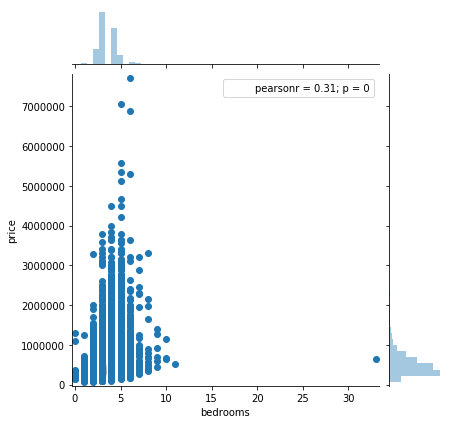

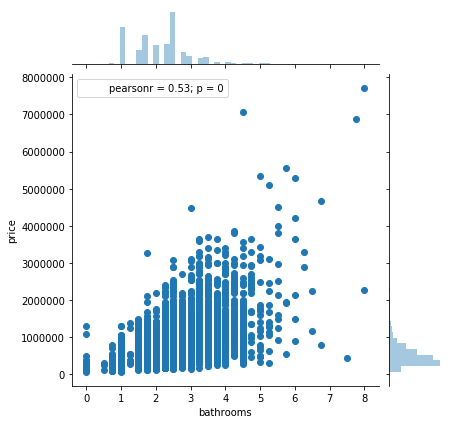

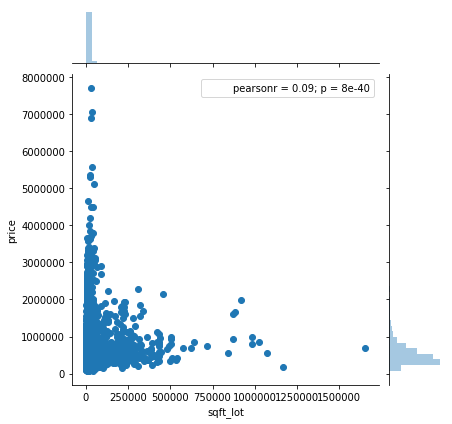

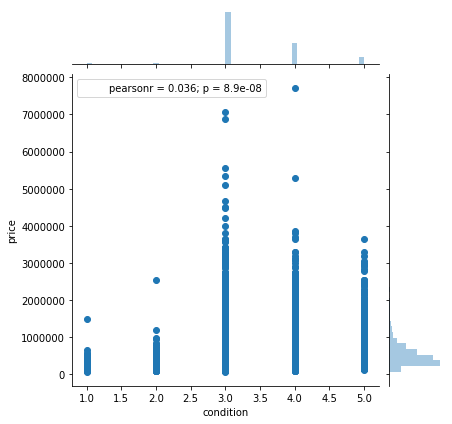

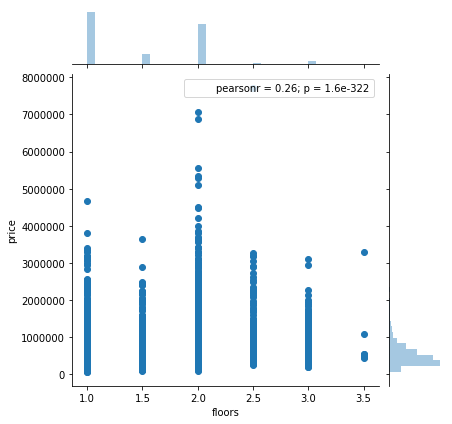

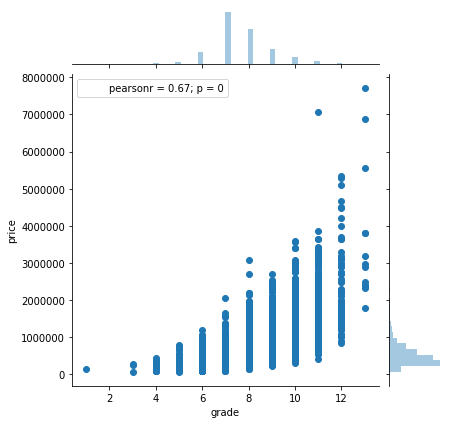

In [14]:
g=(sns.jointplot(x='bedrooms',y='price',data=data).plot_joint(sns.kdeplot, zorder=0, n_levels=6))
sns.jointplot(x='bathrooms',y='price',data=data)
sns.jointplot(x='sqft_lot',y='price',data=data,kind='scatter')
sns.jointplot(x='condition',y='price',data=data)
sns.jointplot(x='floors',y='price',data=data)
sns.jointplot(x='grade',y='price',data=data)

plt.show()

Shows description of the data

In [68]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


In [69]:
data.shape

(21613, 17)

Shows the correlation among the attributes

In [70]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,-0.053203,0.307003,0.021626,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,-0.152668,-0.008931,0.129473,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,-0.203866,0.024573,0.223042,0.568634
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,-0.199430,0.052529,0.240223,0.756420
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,-0.129574,-0.085683,0.229521,0.144608
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,-0.059121,0.049614,0.125419,0.279885
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.030285,-0.014274,-0.041910,0.086463
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.084827,0.006157,-0.078400,0.280439
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,0.003026,-0.014941,-0.106500,-0.092824
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,-0.184862,0.114084,0.198372,0.713202


Scaling the data to bring all the features in a common range to improve the predictability of the model 

In [71]:
scale = MinMaxScaler()
scaled_data = scale.fit_transform(data)

In [72]:
print(scaled_data)

[[ 0.01926557  0.09090909  0.125      ...,  0.57149751  0.21760797
   0.16193426]
 [ 0.06072131  0.09090909  0.28125    ...,  0.90895931  0.16611296
   0.22216486]
 [ 0.01377049  0.06060606  0.125      ...,  0.93614283  0.23754153
   0.3994149 ]
 ..., 
 [ 0.04289849  0.06060606  0.09375    ...,  0.70532411  0.18272425
   0.10686629]
 [ 0.04262295  0.09090909  0.3125     ...,  0.60897539  0.37375415
   0.17398038]
 [ 0.03278689  0.06060606  0.09375    ...,  0.70484156  0.18272425
   0.10686629]]


In [73]:
print(scaled_data.shape)

(21613, 17)


Loading the features into predictors and the target variable into target

In [74]:
predictors=scaled_data[:,1:]
target=scaled_data[:,:1]

Splitting the data into train and test datasets and using 20% of the data as test set. We are splitting the data into test and train sets because we initially fit parameters of our model on the training dataset and finally we measure the success of our model on the test set.

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2)

Implementing OLS by importing scikit learn LinearRegression() function and fitting it to the training data.5 Fold Cross validation is done using cross_val_score and accuracy of the predictions is calculated using mean of five folds. Cross validation is a model evaluation method where some of the data is left out to test the success of the model. In K-Fold cross validation, dataset is divided into k subsets and holdout method is repeated k times. Every dataset gets to be in the test set exactly once.

In [76]:
from sklearn import linear_model
lin = linear_model.LinearRegression().fit(X_train,Y_train)
scores = cross_val_score(lin, X_test, Y_test,cv=5)
print("Accuracy of prediction:", scores.mean())

Accuracy of prediction: 0.680524590421


# Using different coefficient values for Lasso regression and running it on the training data and running 5 fold cross validation on the data. 

In [77]:
coeffs =[0.001,0.01,0.1,1,2]
for coeffval in coeffs:
 lassoreg = linear_model.Lasso(alpha=coeffval).fit(X_train,Y_train)
 scores = cross_val_score(lassoreg,X_test, Y_test,cv=5)
 print("Accuracy while using kernel model with alpha:",coeffval,scores.mean())

Accuracy while using kernel model with alpha: 0.001 0.532293785264
Accuracy while using kernel model with alpha: 0.01 -0.00216452932952
Accuracy while using kernel model with alpha: 0.1 -0.00216452932952
Accuracy while using kernel model with alpha: 1 -0.00216452932952
Accuracy while using kernel model with alpha: 2 -0.00216452932952


Model using Linear Kernel with Kernelized Ridge Regression

In [78]:
from sklearn.kernel_ridge import KernelRidge
kernel_lin = KernelRidge(kernel='linear',alpha=1.0,degree=val).fit(X_train,Y_train)
scores=cross_val_score(kernel_lin,X_test,Y_test,cv=5)
print("Accuracy using linear kernel ",scores.mean())

Accuracy using linear kernel  0.666613520369


Model using Polynomial Kernel with Kernelized Ridge Regression

In [ ]:
degrees=[2,4,7]
for val in degrees:
    poly_lin = KernelRidge(kernel='poly',alpha=1.0,degree=val,coef0=1).fit(X_train,Y_train)
    scores=cross_val_score(poly_lin,X_test,Y_test,cv=5)
    print("Accuracy using polynomial kernel ",val,scores.mean())

Accuracy using polynomial kernel  2 0.690478158362
Accuracy using polynomial kernel  4 0.735023947818
Accuracy using polynomial kernel  7 0.773638160329


Model using Gaussian kernel and different coefficient values

In [ ]:
coeff_sigs=[0.1,0.5,1,2,4]
for coeff in coeff_sigs:
    gaussian_kern=KernelRidge(kernel='rbf',gamma=coeff,alpha=1.0).fit(X_train,Y_train)
    scores=cross_val_score(gaussian_kern,X_test,Y_test,cv=5)
    print("For coefficient sigma: ",coeff,"accuracy is: ",scores.mean())

The best model for this dataset according to my implementation is Ridge Regression using polynomial kernel of degree 7 as it has the highest acuracy among all the models which is 0.773